Visualisation, Assignment 2

Anastasia Brinati

Intended grade: A 

# THE POKEMON CHAMPION
### Challenge 1: The Champion Team Attributes (Grade E)

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math as math

In [6]:
pokemon = pd.read_csv("Pokemon.csv", sep=',')

# Dropping all legendary pokemons, that cannot be part of the team
pokemon = pokemon[pokemon.Legendary != 1]
pokemon = pokemon.drop(['Legendary'], axis=1)

# Dropping all the 'Mega' pokemons, that cannot be part of the team
for i in range(len(pokemon)):
    if(pokemon.Name.get(i) == str(pokemon.Name.get(i-1))+"Mega"+" "+str(pokemon.Name.get(i-1))):
        pokemon = pokemon.drop([i])
        #pokemon[pokemon.Name != pokemon.Name[i]+"Mega"+" "+pokemon.Name[i]]
    if(pokemon.Name.get(i) == str(pokemon.Name.get(i-1))+"Mega"+" "+str(pokemon.Name.get(i-1))+" X"):
        pokemon = pokemon.drop([i])
    if(pokemon.Name.get(i) == str(pokemon.Name.get(i-2))+"Mega"+" "+str(pokemon.Name.get(i-2))+" Y"):
        pokemon = pokemon.drop([i])
    if(pokemon.Name.get(i) == str(pokemon.Name.get(i-3))+"Mega"+" "+str(pokemon.Name.get(i-3))+" Z"):
        pokemon = pokemon.drop([i])

#pokemon.tail(304)

- **What were the in-game attributes selected to base the Champion team upon?** I choose 'Attack' (main) and 'Special Defense' (secondary) as the two in-game attributes to base the Champion team upon.

In [7]:
# Changing plt's default rendering system to the interactive one
%matplotlib widget

In [8]:
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact
import mplcursors
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image

import sys
sys.executable

'C:\\ProgramData\\Anaconda3\\python.exe'

In [5]:
# Check
!conda list ipympl

# packages in environment at C:\Users\Giulio\anaconda3:
#
# Name                    Version                   Build  Channel
ipympl                    0.9.3              pyhd8ed1ab_0    conda-forge


In [9]:
def annotation_func():
    lambda sel:sel.annotation.set_text(pokemon.iloc[sel.index]['Name'])

In [10]:
def annotation_func2(sel):
    sel.annotation.set_text(pokemon.iloc[sel.index]['Name'])

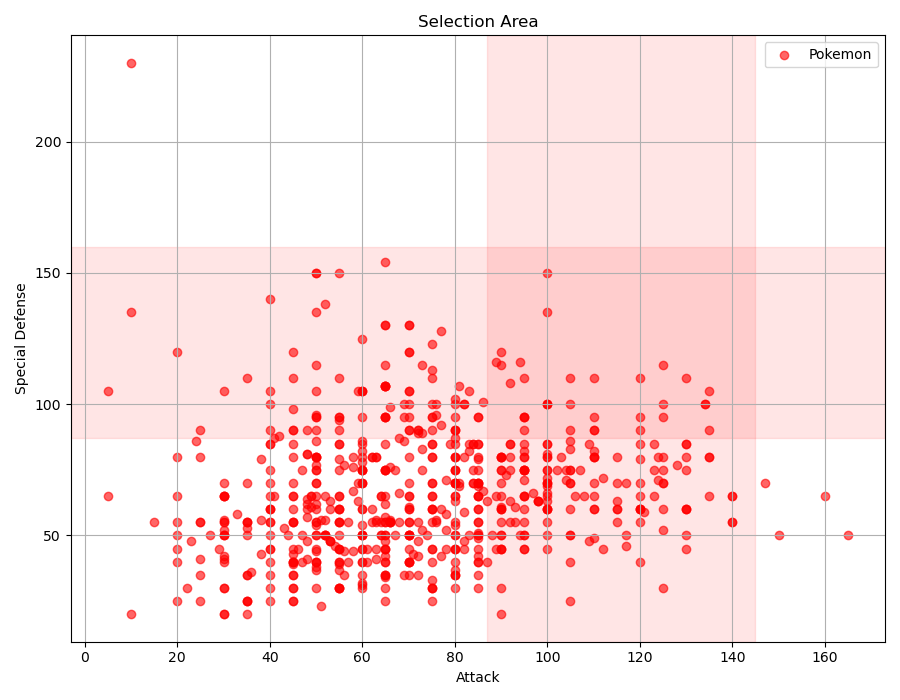

In [11]:
attack = pokemon.Attack
special_defense = pokemon.Sp_Def

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot()
s = ax.scatter(attack, special_defense, label="Pokemon", color="red", alpha=0.6)
ax.set_title("Selection Area")
ax.set_xlabel("Attack")
ax.set_ylabel("Special Defense")
ax.grid()
ax.legend(loc='upper right')

# Highligthing the best selection area intervals
max_attack = np.max(attack)
max_sp_defense = np.max(special_defense)
plt.axvspan(87, max_attack-20, color="red", alpha=0.1)
plt.axhspan(87, max_sp_defense-70, color="red", alpha=0.1)

# Adding an Interactive cursor
# I had some problems with the cursors on my pc, but I tried to run this exact code on another
# and it didn't give any problems.

cursor = mplcursors.cursor(s, hover=True)
#cursor.connect("add", annotation_func2)
#cursor.connect("add", annotation_func)
cursor.connect("add", lambda sel:sel.annotation.set_text(pokemon.iloc[sel.index]['Name']))
#pokemon_names = list(pokemon['Name'].values)
#cursor.connect("add", lambda sel: sel.annotation.set_text(pokemon_names[sel.index]))

fig.tight_layout()

- **What limits were established for the selection area?** I decided to start from the maximum value reached from both attributes, and than extend the area trying to include a reasonable amount of points. It is noticeable that it wouldn't make a lot of sense to select the pokemons that are outliers on one attribute, because they lose effectiveness in the other. For this reasoning I believe the area from which is better to pick pokemons as to create a champion team based upon these two attributes is the one shown in the graph above.

    Attack[87, 145]
    
    Special_Defense[87,160]

### Challenge 2: The Ace Pokemon (Grade D)

interactive(children=(IntSlider(value=1, description='level', max=6, min=1), Output()), _dom_classes=('widget-…

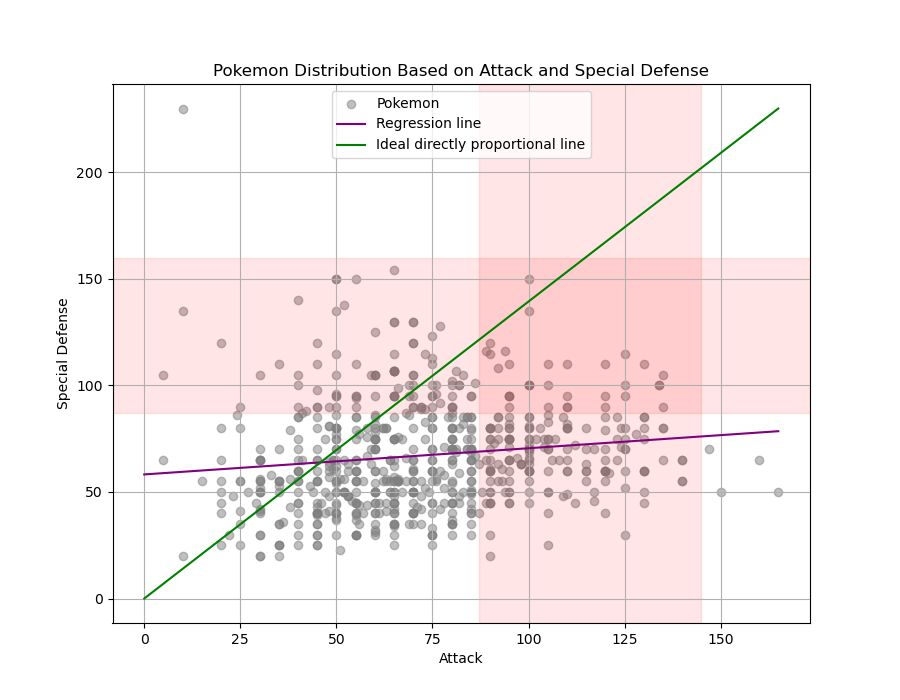

In [12]:
attack = pokemon.Attack
special_defense = pokemon.Sp_Def
x_values = [0, max_attack]
y_values = [0, max_sp_defense]

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot()

max_attack = np.max(attack)
max_sp_defense = np.max(special_defense)
    
# Interaction loop
def foo(level):
    ax.clear()
    
    # Linear regression
    deg = level
    data_linreg = np.polyfit(list(attack),  list(special_defense), deg)
    xp = np.linspace(-0.02, max_attack)
    yp = np.polyval(data_linreg, xp)
    ax.scatter(attack, special_defense, label="Pokemon", color='grey', alpha=0.5)
    
    # plotting lines
    ax.plot(xp, yp, color='purple', label='Regression line')
    ax.plot(x_values, y_values, color='green', label='Ideal directly proportional line')
    
    # highlighting selection area
    plt.axvspan(87, max_attack-20, color="red", alpha=0.1)
    plt.axhspan(87, max_sp_defense-70, color="red", alpha=0.1)
    
    ax.set_xlabel("Attack")
    ax.set_ylabel("Special Defense")
    ax.set_title("Pokemon Distribution Based on Attack and Special Defense")
    ax.grid()
    ax.legend(loc='upper center')
    
    
    # interactive cursor to highlight pokemon name on click
    cursor = mplcursors.cursor(hover=False)
    cursor.connect("add", lambda sel:sel.annotation.set_text(pokemon.iloc[sel.index]['Name']))
    
interact(foo, level=widgets.IntSlider(min=1, max=6, step=1, value=1));

- **Which regression degree fitted better with the plotted data?** The best fitting regression in my opinion is in the first degree: even if just sligthly tilted upwards, the slope shows that there is a correlation between an increasing attack value and an increasing special defense.

- **Which Pokemon is the Ace for this team?** I believe that the regression line gives a better understanding of how the pokemons are distributed as compared to the ideal line that is based on values that belong to very isolated outliers. For this reason I started by considering 'Gallade', 'Flareon' and 'Escavalier' to be the ace pokemon: first of all, they all lay in the selection area, secondly I wanted someone who would have a good balance between the two attributes and at the same time a good balance between the lines, (that I try to show in the graph below), but also that would lay more towards the regression line. 
In the end, my ace pokemon is 'Flareon'.

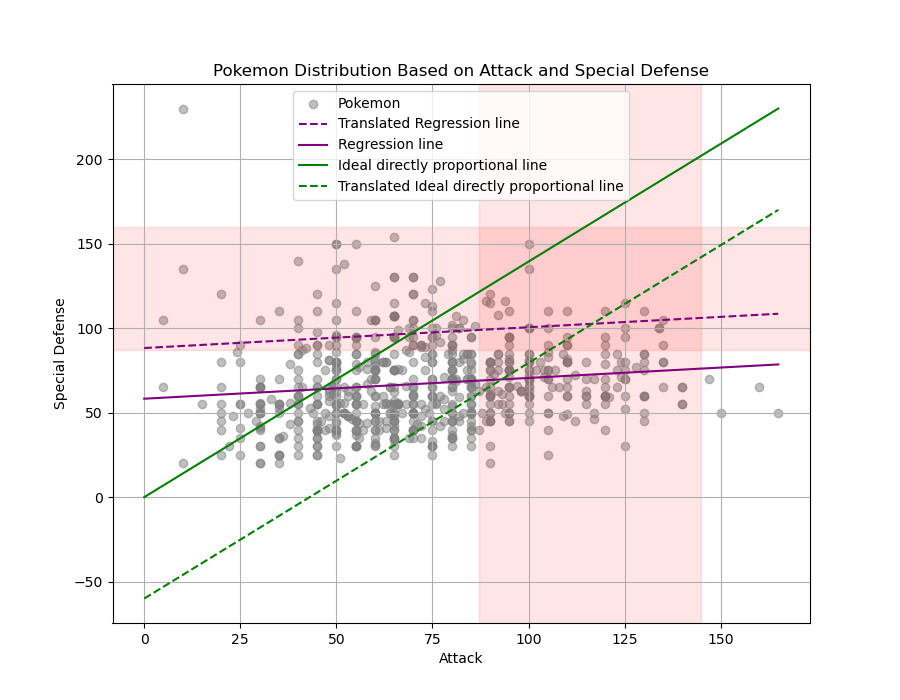

In [13]:
# Tried to show how I motivated my choice for 'Flareon'
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot() 

data_linreg = np.polyfit(list(attack),  list(special_defense), 1)
xp = np.linspace(-0.02, max_attack)
yp = np.polyval(data_linreg, xp)
ax.scatter(attack, special_defense, label="Pokemon", color='grey', alpha=0.5)
    
# plotting lines
x_values = [0, max_attack]
y_values = [0, max_sp_defense]

ax.plot(xp, yp+30, '--', color='purple', label='Translated Regression line')
ax.plot(xp, yp, color='purple', label='Regression line')
ax.plot(x_values, y_values, color='green', label='Ideal directly proportional line')
y_values = [-60, max_sp_defense-60]
ax.plot(x_values, y_values, '--', color='green', label='Translated Ideal directly proportional line')

# interactive cursor to highlight pokemon name on click
cursor = mplcursors.cursor(hover=False)
cursor.connect("add", lambda sel:sel.annotation.set_text(pokemon.iloc[sel.index]['Name']))

# highlighting selection area
attack = pokemon.Attack
special_defense = pokemon.Sp_Def
plt.axvspan(87, max_attack-20, color="red", alpha=0.1)
plt.axhspan(87, max_sp_defense-70, color="red", alpha=0.1)
    
ax.set_xlabel("Attack")
ax.set_ylabel("Special Defense")
ax.set_title("Pokemon Distribution Based on Attack and Special Defense")
ax.grid()
ax.legend(loc='upper center')

### Challenge 3: The Champion Team Type (Grade C)

In [14]:
# Colors similar to the one from the given link
# but I changed the Bug one because it was too similar to Normal

colors = ["green", "orange", "royalblue", "lightgreen", "olive", "purple", "yellow", "brown", "pink", "red", "magenta", "dimgrey", "violet", "cyan", "indigo", "black", "silver", "skyblue"]

# Obtaining a list of dataframes, each one per one type

pokemon_grouped = pokemon.groupby(pokemon.Type1)
df_list = []

types = pd.DataFrame(pokemon['Type1'].drop_duplicates())
#types = types.reset_index(drop=True)
types = types['Type1'].values.tolist()
#print(types)

# df_list[j][k]
# k=0 -> type
# k=1 -> color
# k=2 -> dataframe
for i in range(0, len(types)):
    df_list.append([types[i], colors[i], pokemon_grouped.get_group(types[i])])


interactive(children=(Checkbox(value=False, description='Grass'), Checkbox(value=False, description='Fire'), C…

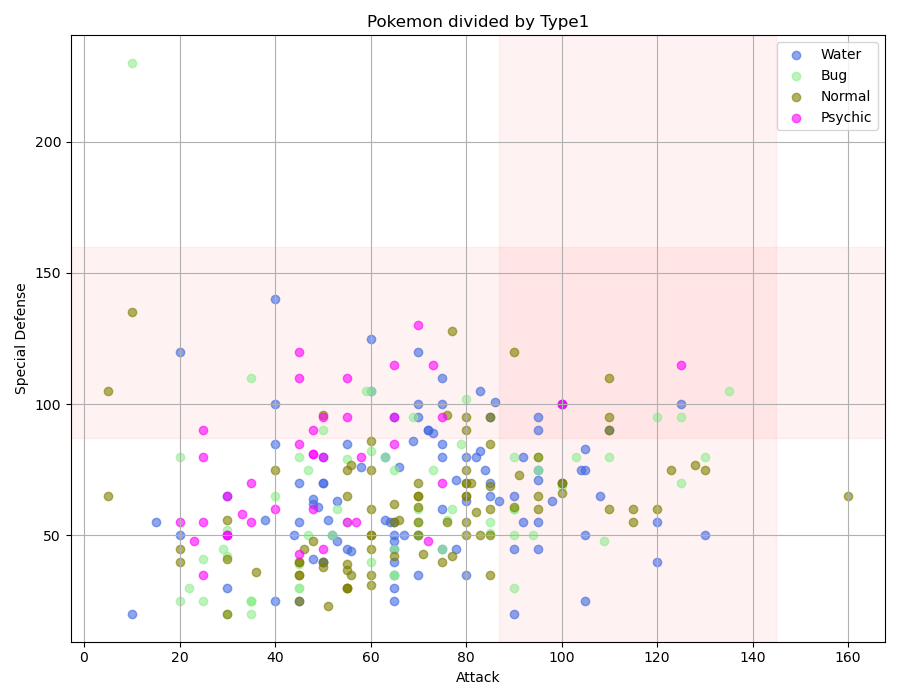

In [15]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot()

def reset_ax():
    ax.clear()
    
    ax.set_title("Pokemon divided by Type1")
    ax.set_xlabel("Attack")
    ax.set_ylabel("Special Defense")
    ax.grid()
    
    # Highligthing the best selection area intervals
    attack = pokemon.Attack
    special_defense = pokemon.Sp_Def
    max_attack = np.max(attack)
    max_sp_defense = np.max(special_defense)
    plt.axvspan(87, max_attack-20, color="red", alpha=0.05)
    plt.axhspan(87, max_sp_defense-70, color="red", alpha=0.05)


def func(Grass, Fire, Water, Bug, Normal, Poison, Electric, Ground, Fairy, Fighting, Psychic, Rock, Ghost, Ice, Dragon, Dark, Steel, Flying):
    
    reset_ax()

    if(Grass==True):
        i=0
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Fire==True):
        i=1
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Water==True):
        i=2
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Bug==True):
        i=3
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Normal==True):
        i=4
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Poison==True):
        i=5
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Electric==True):
        i=6
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Ground==True):
        i=7
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Fairy==True):
        i=8
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Fighting==True):
        i=9
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Psychic==True):
        i=10
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Rock==True):
        i=11
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Ghost==True):
        i=12
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Ice==True):
        i=13
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Dragon==True):
        i=14
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Dark==True):
        i=15
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Steel==True):
        i=16
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    if(Flying==True):
        i=17
        attack = df_list[i][2].Attack
        special_defense = df_list[i][2].Sp_Def
        ax.scatter(attack, special_defense, label=df_list[i][0], color=df_list[i][1], alpha=0.6)
    
    ax.legend(loc='upper right')
    if(Grass==True or Fire==True or Water==True or Bug==True or Normal==True or Poison==True or Electric==True or Ground==True or Fairy==True or Fighting==True or Psychic==True or Rock==True or Ghost==True or Ice==True or Dragon==True or Dark==True or Steel==True or Flying==True):
        ax.legend()
    if(Grass==False and Fire==False and Water==False and Bug==False and Normal==False and Poison==False and Electric==False and Ground==False and Fairy==False and Fighting==False and Psychic==False and Rock==False and Ghost==False and Ice==False and Dragon==False and Dark==False and Steel==False and Flying==False):
        ax.legend('', frameon=False)
    
    # Not necessary on my pc, but on some computer it was needed
    fig.canvas.draw()
    fig.tight_layout()

interact(func, Grass=False, Fire=False, Water=True, Bug=True, Normal=True, Poison=False, Electric=False, Ground=False, Fairy=False, Fighting=False, Psychic=True, Rock=False, Ghost=False, Ice=False, Dragon=False, Dark=False, Steel=False, Flying=False);

- **Which are the 3 Pokemon types that have the highest number of Pokemon within the boundaries established for each in-game attribute?** From all the points falling in the attack's interval we have that the main types are Rock/Bug each with 16 elements, Normal with 18, and Water that has 25 pokemons in between the boundaries. (For the third place between Rock and Bug I choose Bug because it has more points in the Selection Area).
For Special Defense we have that again the Normal type makes the top three with 12 points, than we have Psychic with 14, and on the top again Water, with 20 pokemons.

- **What is the Champion team type?** The Champion Team type is of course Water, because it is the top choice for both attributes, and also because it has the most points inside the selection area.

In [16]:
ace_pokemon = pokemon[pokemon["Name"]=="Flareon"]
ace_type = "Fire"
ace_color = "red"
main_type = "Water"
main_type_color = "royalblue"

### Challenge 4: The Best Pokemon in the Type (Grade B)

interactive(children=(Dropdown(description='Level', options=('Room 1', 'Room 2'), value='Room 1'), Output()), …

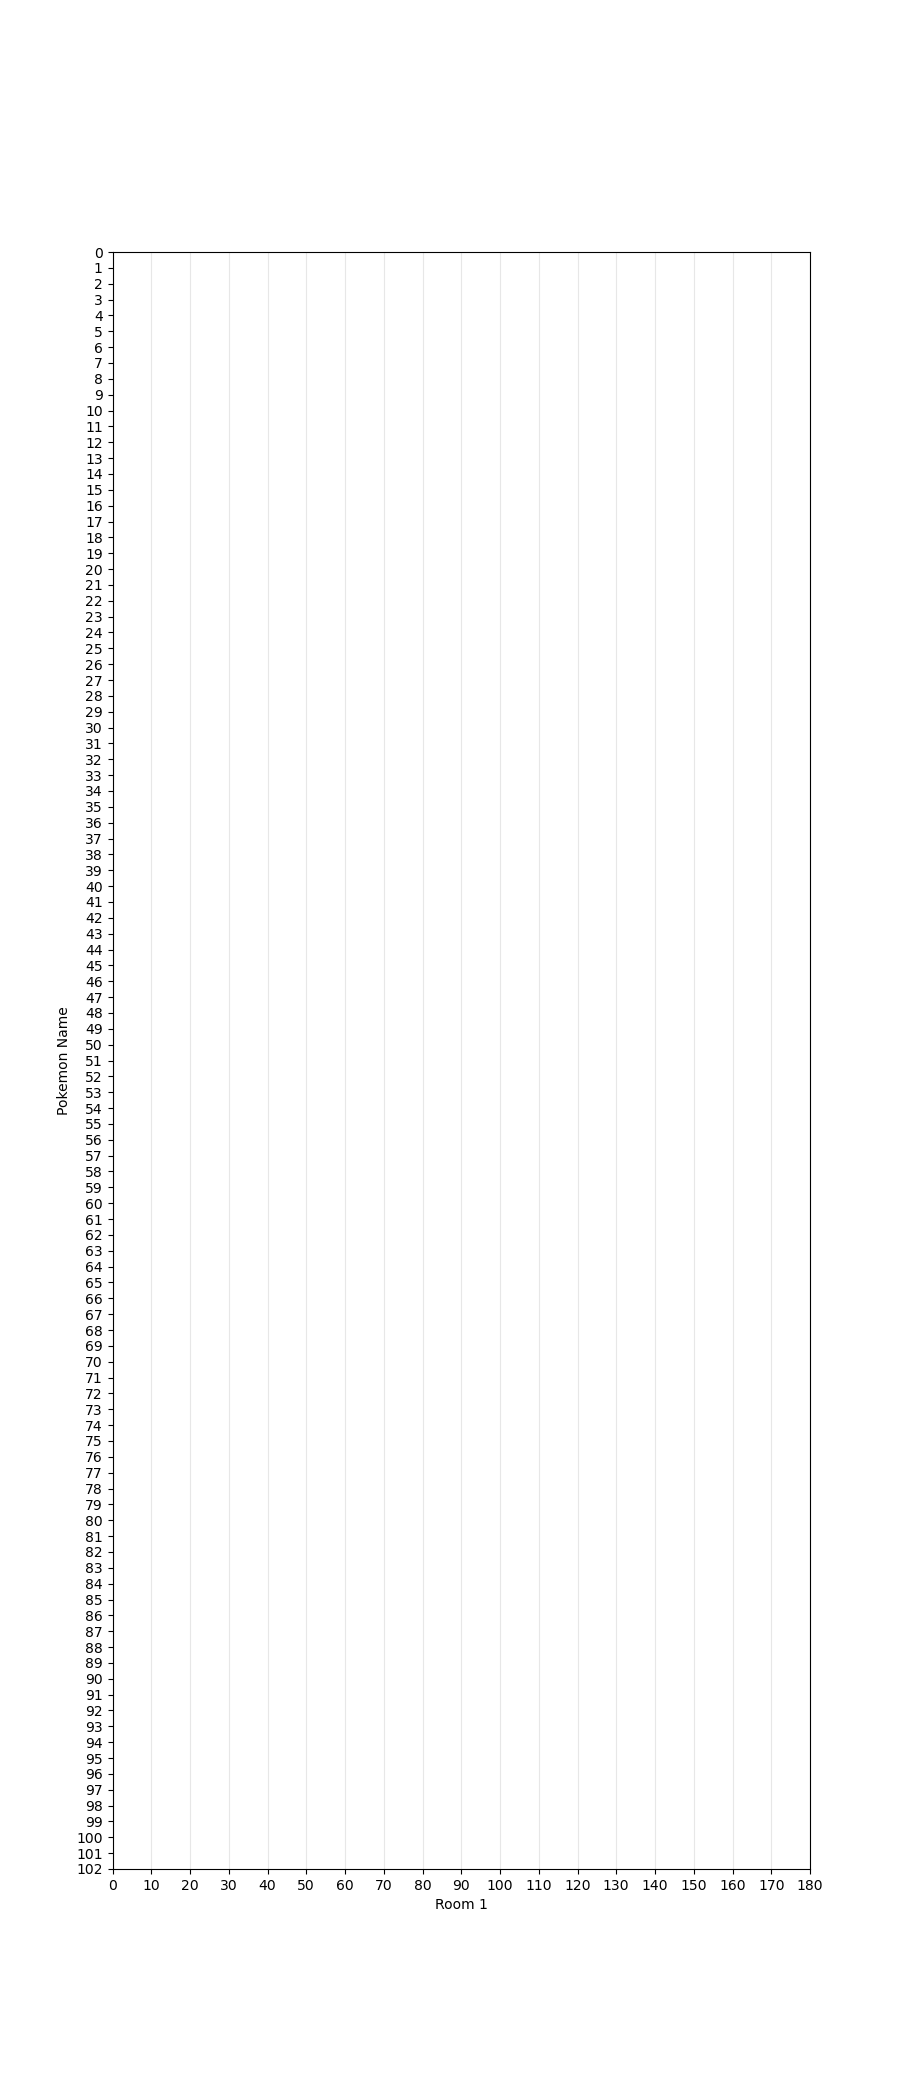

In [19]:
# Use only the dataframe containing the Champion Team Type: Water

for i in range(0, len(types)):
    if(df_list[i][0]==main_type):
        water_pokemons = df_list[i][2]

#water_pokemons

attributes = water_pokemons.columns[5:-2]

fig = plt.figure(figsize=(9,21))
ax = fig.add_subplot()


#def change_attribute(Attribute):
def change_attribute(Level):
    
    ax.clear()
    #ax.set_xlabel(Attribute)
    ax.set_xlabel(Level)
    ax.xaxis.grid(alpha=0.3)
    data_y = np.arange(len(water_pokemons['Name']))
    data_x = np.arange(0,190,10)
    ax.set_xticks(data_x)
    ax.set_yticks(data_y)
    #plt.yticks(fontsize=10, rotation=15)
    ax.set_ylabel("Pokemon Name")
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_title(Attribute + " Values for " + main_type + " Pokemons")
    plt.margins(y=0.005)
    p = ax.barh(water_pokemons['Name'], water_pokemons[Attribute], color=main_type_color)
    ax.bar_label(p, label_type='edge', color="#444444")
    
    # Not necessary on my pc, but on some computer it was needed
    fig.canvas.draw()
    fig.tight_layout()
    
levels = [ 'Room 1', 'Room 2']

#interact(change_attribute, Attribute=list(attributes.values));
interact(change_attribute, Level=levels);

- **Which Pokemon compose the Champion team?** From the visualisation above we obtain:

        HP: Wailord (170)
        Attack: Kingler (130)
        Defense: Cloyster (180)
        Sp_atk: Keldeo (*) (129)
        Sp_def: Mantine (140)
        Speed: Greninja (122)
        
    Since our ace pokemon is Flareon, which is very good with Attack and quite good with both the special techniques, but not as much with the rest of the attributes, my intention is to keep the team as it is for HP, Defense and Speed, while discarding one between Kingler, Keldeo and Mantine. Since Attack is the strongest attribute for Flareon, with the same starting values as Kingler (130), I believe the best choice is to leave this on out.
    
    My Champion Team is: Flareon, Wailord, Cloyster, Keldeo, Mantine and Greninja.

    (*) Keldeo appears in two forms, Ordinary and Resolute, but in terms of the 6 attributes we are considering, they both always assume the same values. That's why I am just calling it "Keldeo" withouth specifying the form.

### Challenge 5: The Champion Team (Grade A)

In [21]:
champions = ["Wailord", "Cloyster", "KeldeoOrdinary Forme", "Mantine", "Greninja"]
champion_team = pd.DataFrame(ace_pokemon)

for i in range(0,len(champions)):
    champion_pokemon = water_pokemons[water_pokemons["Name"]==champions[i]]
    champion_team = pd.concat([champion_team, pd.DataFrame(champion_pokemon)])
    
champions.insert(0, "Flareon")
champion_team

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1
713,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6


interactive(children=(Dropdown(description='Pokemon', options=('Flareon', 'Wailord', 'Cloyster', 'KeldeoOrdina…

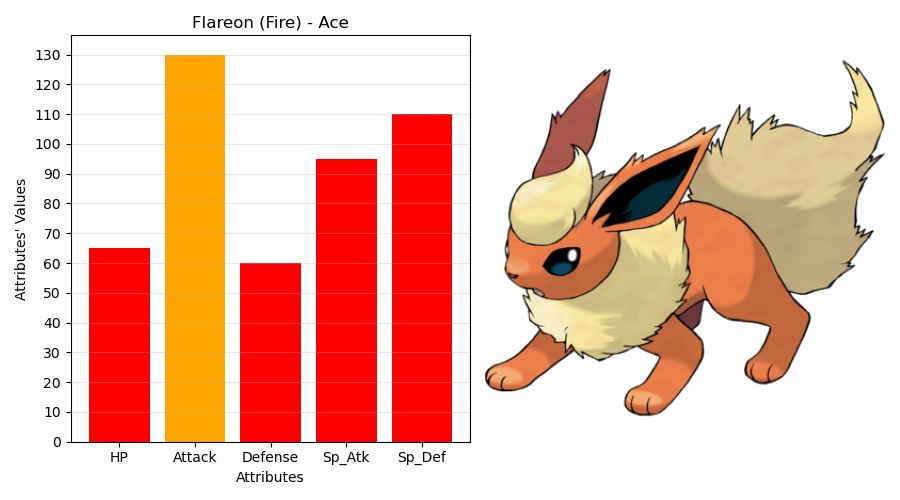

In [28]:
fig1 = plt.figure(figsize=(9,5))
ax = fig1.subplots(nrows=1, ncols=2)

def foo(Pokemon):
    
    ax[0].clear()
    colore = main_type_color
    champion = pd.DataFrame(champion_team[champion_team["Name"]==Pokemon])
    
    # Change left ax title based on the pokemon
    title = Pokemon + " (" + champion.iloc[0]['Type1']
    if not(champion.isnull().values.any()):
        title = title + ", " + str(champion.iloc[0]['Type2'])
    title = title + ")"
    if(Pokemon == "Flareon"):
        title = title + " - Ace"
        colore = ace_color    
    ax[0].set_title(title)
    
    # Labels and ticks
    ax[0].set_xlabel("Attributes")
    ax[0].yaxis.grid(alpha=0.3)
    data_x = np.arange(len(attributes))
    data_y = np.arange(0,190,10)
    ax[0].set_xticks(data_x)
    ax[0].set_yticks(data_y)
    ax[0].set_ylabel("Attributes' Values")
    
    # Color one bar differently from the others
    colori = []
    best_attribute = 0
    idx = 0
    for i in range(0, len(champion[attributes].iloc[0])):
        colori.append(colore)
        if(champion[attributes].iloc[0,i] > best_attribute):
            best_attribute = champion[attributes].iloc[0,i]
            idx = i
    colori[idx] = "orange"
    
    ax[0].bar(attributes, champion[attributes].iloc[0], color=colori)
    
    # Visualize picture in the right ax
    img_path = 'pokepics/' + Pokemon + ".png"
    img = Image.open(img_path)
    ax[1].clear()
    ax[1].axis('off')
    ax[1].imshow(img)
    
    # Not necessary on my pc, but on some computer it was needed
    fig1.canvas.draw()
    fig1.tight_layout()
    

interact(foo, Pokemon=champions);